In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [74]:
def dataMatrix(n, f):
    return np.random.rand(n,f)

In [75]:
X = dataMatrix(10, 10)

In [76]:
def output(X, W, W0, var):
    a = np.dot(X, W)
    a = a.sum(axis = 1)
    #print(a)
    #print(a + W0)
    return a + W0 + var
    

In [77]:
W = np.random.rand(10, 1)
W0 = np.random.rand(1,1)
var = np.random.rand(1, 10)

In [78]:
Y = output(X, W , W0, var)

In [79]:
Y

array([[2.80848395, 5.2049614 , 2.26543961, 4.1615721 , 4.21937459,
        5.42575431, 3.86927472, 4.3266761 , 4.49593326, 4.60680796]])

In [80]:
def linearRegressionEstimate(X, w):
    y = np.dot(X, w)
    return y

In [81]:
linearRegressionEstimate(X, W)

array([[2.13787725],
       [3.96351707],
       [1.65998984],
       [3.48022842],
       [2.80507912],
       [4.00836465],
       [2.88026581],
       [3.33998469],
       [3.11177419],
       [3.5381729 ]])

In [82]:
def meanSquareError(y, t):
    mse = np.mean((y - t) ** 2)
    return mse

In [83]:
t = np.random.rand(1, 10)
meanSquareError(Y, t)

13.687032683924121

In [84]:
def linearRegressionWeights(X, t, lamda):
    X_reg = X
    X_reg = X_reg + lamda * np.eye(X.shape[0])
    X_pinv = np.linalg.pinv(X_reg)
    w = np.dot(X_pinv, t.T)
    y = X.dot(w)
    mse = meanSquareError(y, t)
    return w, mse, y


In [85]:
linearRegressionWeights(X, t, 3)

(array([[ 0.11568338],
        [ 0.10999667],
        [ 0.06348321],
        [ 0.1486133 ],
        [-0.0035415 ],
        [-0.08767845],
        [ 0.04233928],
        [ 0.13696613],
        [ 0.01903767],
        [ 0.16728269]]),
 0.11537716987363433,
 array([[0.19778659],
        [0.46187931],
        [0.14084995],
        [0.31920341],
        [0.36181719],
        [0.42193967],
        [0.46122068],
        [0.30188433],
        [0.29372955],
        [0.46026516]]))

In [86]:
def gradientMSE(X, t, w):
    y = linearRegressionEstimate(X, w)
    err = y - t
    gradient = 2 * np.dot(X.T, err) / X.shape[0]
    return gradient

In [87]:
gradientMSE(X, t, W)

array([[2.78505664, 2.53419241, 3.00190589, 2.56143449, 2.98170425,
        3.17697514, 2.74098167, 2.6145057 , 2.9820598 , 2.3613079 ],
       [3.46254232, 3.15850258, 3.72535694, 3.19151914, 3.70087316,
        3.93753548, 3.4091248 , 3.25583982, 3.70130409, 2.94897187],
       [2.3870706 , 2.15952067, 2.58376676, 2.18423098, 2.56544257,
        2.74256578, 2.34709177, 2.23236997, 2.56576509, 2.00270335],
       [2.27131143, 2.05197598, 2.46090693, 2.07579426, 2.44324424,
        2.61397336, 2.23277583, 2.12219544, 2.44355511, 1.9008197 ],
       [2.78260159, 2.52423946, 3.00593209, 2.55229576, 2.98512665,
        3.18623386, 2.73720929, 2.60695318, 2.98549284, 2.34618772],
       [2.23946963, 2.00114568, 2.44547894, 2.02702597, 2.42628714,
        2.61179677, 2.19759788, 2.07744425, 2.42662492, 1.83690338],
       [2.03193076, 1.82101329, 2.21424968, 1.84391743, 2.19726488,
        2.36144151, 1.99487413, 1.88853777, 2.19756381, 1.67565831],
       [1.79931923, 1.62988149, 1.9457827

In [88]:
def l2Norm(w):
    norm2 = np.linalg.norm(w, ord=2) #Order 2 L2 normalization
    return norm2

In [89]:
l2Norm(W)

2.1701681965517197

In [90]:
def gradientL2Nnorm(w):
#     gradient = np.zeros(w.shape)
    gradient = w / np.linalg.norm(w, ord=2)
    return gradient

In [91]:
gradientL2Nnorm(W)

array([[0.38241682],
       [0.447718  ],
       [0.2168436 ],
       [0.20735324],
       [0.45327921],
       [0.13141474],
       [0.00895122],
       [0.03883575],
       [0.39465756],
       [0.42803581]])

In [92]:
def l1Norm(w):
    norm1 = np.linalg.norm(w, ord=1) #Order 1 L1 normalization
    return norm2

In [93]:
def gradientL1Nnorm(w):
    return w / np.linalg.norm(w, ord=1)

In [94]:
gradientL1Nnorm(W)

array([[0.14113895],
       [0.16523972],
       [0.08003068],
       [0.07652806],
       [0.1672922 ],
       [0.04850137],
       [0.00330363],
       [0.01433315],
       [0.14565665],
       [0.15797559]])

In [95]:
def update_weights_linear_regression(X, t, w, eta, lambda2, lambda1):
    y = linearRegressionEstimate(X, w)
    mse = 0.5*meanSquareError(y, t)
    gradient = np.dot((y-t), X.T + lambda2*w + lambda1*np.sign(w))
    w = w - (eta*gradient)
    return w, mse

In [96]:
update_weights_linear_regression(X, t, W, 0.1, 2, 1)

(array([[-3.30993176, -3.47697604, -3.12896039, -3.38343468, -3.32286544,
         -3.42399097, -3.38119433, -3.41918086, -3.26652506, -3.52592417],
        [-7.9449892 , -8.33305664, -7.54473859, -8.12647664, -7.99215194,
         -8.2297282 , -8.17342571, -8.20441263, -7.87905366, -8.4428182 ],
        [-2.41886492, -2.52805322, -2.29529304, -2.46410135, -2.42283866,
         -2.48824626, -2.44898496, -2.48880375, -2.38135547, -2.56108257],
        [-7.20210028, -7.53165783, -6.85989791, -7.35500175, -7.2402018 ,
         -7.44165643, -7.38892925, -7.42176913, -7.14212864, -7.62532069],
        [-4.90187682, -5.14969665, -4.64076723, -5.01484397, -4.92731991,
         -5.078313  , -5.03058048, -5.06600892, -4.85023668, -5.22086978],
        [-8.74876381, -9.14226078, -8.34312652, -8.93290394, -8.7967674 ,
         -9.03769563, -8.98106136, -9.01187634, -8.68227485, -9.25351625],
        [-6.06286866, -6.31979105, -5.79272833, -6.18028302, -6.08972143,
         -6.24633407, -6.1980453

In [97]:
def gradient_descent(X, t, lambda2, lambda1, eta, max_iter, min_change_NRMSE):
    w = np.random.randn(X.shape[1])
    prev_nrmse = 100
    for i in range(max_iter):
        w = w.T
        w, mse = update_weights_linear_regression(X, t, w, eta, lambda2, lambda1)
        nrmse = np.sqrt(mse)/(np.max(t) - np.min(t))
        if abs(prev_nrmse - nrmse) < min_change_NRMSE:
            break
        prev_nrmse = nrmse
    return w, nrmse

In [98]:
gradient_descent(X, t, 0.1, 0.2, 0.01, 30, 0.000001)

(array([[ 0.62898716,  0.76379402,  0.43129353,  0.75340936,  0.5127746 ,
          0.82378566,  0.93755618,  0.896308  ,  0.68453643,  0.80016213],
        [-0.46226169, -0.34105043, -0.54093637, -0.36434011, -0.51227082,
         -0.30848456, -0.24891315, -0.29148776, -0.37938354, -0.34794382],
        [ 0.98777745,  1.28601269,  0.68244362,  1.18277527,  0.92996442,
          1.29775205,  1.39276907,  1.33593998,  1.03453402,  1.35982959],
        [-0.24681445, -0.56477452,  0.13318499, -0.38051537, -0.33280815,
         -0.45628944, -0.41362415, -0.43458771, -0.10763017, -0.72277133],
        [-4.21496472, -5.01617368, -3.30343767, -4.63200631, -4.23772365,
         -4.8704363 , -4.89072703, -4.90703001, -4.05870846, -5.32054908],
        [-1.76500526, -2.09682652, -1.26005634, -1.94464552, -1.74206217,
         -2.04081854, -2.06639317, -2.10120811, -1.61774821, -2.29036529],
        [ 0.91179169,  0.802653  ,  1.06703996,  0.89838615,  0.80456499,
          0.88847419,  0.9448549

In [99]:
def generateData(num_samples, var):
    X_train = dataMatrix(num_samples, var)
    t_train = X_train.dot(np.random.randn(var)) + np.random.randn(num_samples)
    X_val = dataMatrix(num_samples, var)
    t_val = X_val.dot(np.random.randn(var)) + np.random.randn(num_samples)
    return X_train, X_val, t_train, t_val

In [100]:
def pseudoInverseRegression(X_train, t_train, X_val, t_val, alpha = 0, noise_var = 0):
    #X_train = np.dot(X_train.T, X_train)
    #t_train = np.dot(t_train.T, t_train)
    a = np.dot(X_train, X_train.T)
    print(np.shape(a))
    X_dagger = np.linalg.pinv(np.dot(X_train, X_train.T) + alpha * np.eye(X_train.shape[0]) + noise_var * np.eye(X_train.shape[0]))
    X_dagger = np.dot(X_train.T, X_dagger)

    # Calculate the regression coefficients
    print(t_train)
    
    w = np.dot(X_dagger, t_train)
    
   
    
    #X_train = alpha + noise_var * X_train
    #w = np.linalg.pinv(X_train).dot(t_train)
    print(w)
    t_train_pred = X_train.dot(w)
    t_val_pred = X_val.dot(w)
    train_nrmse = np.sqrt(np.mean((t_train - t_train_pred)**2)) / np.std(t_train)
    val_nrmse = np.sqrt(np.mean((t_val - t_val_pred)**2)) / np.std(t_val)
    return train_nrmse, val_nrmse

[[0.88335524 0.29875899 0.30216263 0.48106703 0.44158355]
 [0.20608296 0.67500313 0.92727249 0.59747485 0.81044499]
 [0.39990619 0.73053647 0.91588919 0.02252751 0.68329292]
 [0.08064665 0.71389193 0.40992334 0.91484438 0.29722997]
 [0.16049293 0.8097381  0.48008891 0.30478228 0.96892164]
 [0.79467931 0.01859878 0.19773632 0.09882994 0.59987849]
 [0.08445324 0.2734797  0.86501866 0.10238372 0.58662501]
 [0.91357268 0.04882495 0.57358248 0.17808363 0.3612035 ]
 [0.43505923 0.55459295 0.55230165 0.98707745 0.99963652]
 [0.46089051 0.29873657 0.50897031 0.52027841 0.69915681]]
(10, 10)
[ 1.26384945 -2.12123408  1.25310326 -0.8907575  -1.3397585   0.73877016
  2.25765497  1.43444442 -0.18371639 -0.30347365]
[ 1.54672188 -1.36710506  2.02562241 -1.01093843 -1.00500799]


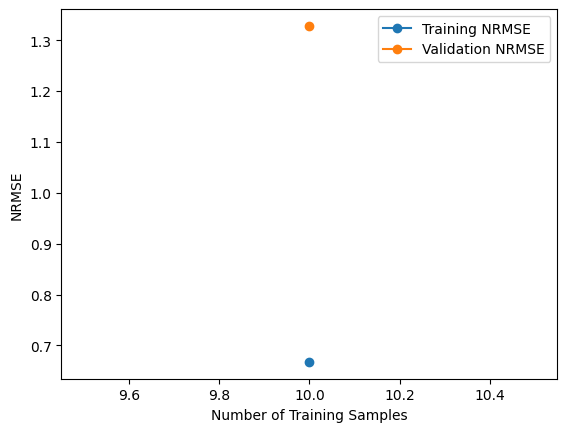

In [101]:
num_samples_list = [10*x for x in range(1,2)]
train_nrmse_list = []
val_nrmse_list = []
var = 5
for num_samples in num_samples_list:
    X_train, X_val, t_train, t_val = generateData(num_samples, var)
    print(X_train)
    train_nrmse,val_nrmse = pseudoInverseRegression(X_train, t_train, X_val, t_val, 0, 0)
    train_nrmse_list.append(train_nrmse)
    val_nrmse_list.append(val_nrmse)

# I thought here that line plot looks better than line plot
plt.plot(num_samples_list, train_nrmse_list, 'o-', label='Training NRMSE')
plt.plot(num_samples_list, val_nrmse_list, 'o-', label='Validation NRMSE')
plt.xlabel('Number of Training Samples')
plt.ylabel('NRMSE')
plt.legend()
plt.show()

(100, 100)
[ 1.47328938 -0.11631295  2.62126441  0.84762325 -0.58834505  0.70514301
 -3.34824991 -0.05383999 -0.19064422  1.10679893 -1.46782748 -1.21081832
 -0.95217268  0.94234033 -0.57226009  0.70826845  1.72464381  1.46639756
 -1.069461    2.25887999  1.59758491  0.62984262  0.48362165 -0.34761715
 -0.01884747  0.74648944  1.62174832 -1.24063742 -1.56499513 -0.45329886
  1.68067159 -0.57430214  0.99614088 -0.90905133 -1.23334939  0.05428814
 -0.57851322  0.24666374  0.68470492 -2.27115677  0.58746524  0.83959735
 -1.45439168  1.26811975 -0.21091055  0.21071265  1.86338784 -0.79151011
  0.23580677  0.36541957  0.21015971  1.26415281 -0.34101536  0.43495655
 -0.69633798  0.13424529  1.33004465  0.03015061  1.53375271  0.12205757
 -1.32908485 -0.09668599  0.18485269 -0.33599676 -1.09080356  1.97577119
  0.34127678  0.09804959 -1.33923855 -1.12146613  1.25867996  0.70373936
  0.06962225  0.71486951 -1.27529313  1.27135768  0.44625363 -1.73121649
 -0.00594456  0.89743474  0.16369413  1.

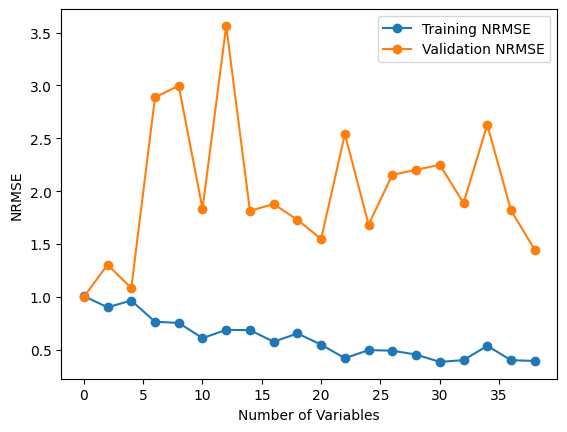

In [102]:
num_samples = 100
train_nrmse_list = []
val_nrmse_list = []
var = [2*x for x in range(20)]
for va in var:
    X_train, X_val, t_train, t_val = generateData(num_samples, va)
    train_nrmse,val_nrmse = pseudoInverseRegression(X_train, t_train, X_val, t_val)
    train_nrmse_list.append(train_nrmse)
    val_nrmse_list.append(val_nrmse)

# I thought here that line plot looks better than line plot
plt.plot(var, train_nrmse_list, 'o-', label='Training NRMSE')
plt.plot(var, val_nrmse_list, 'o-', label='Validation NRMSE')
plt.xlabel('Number of Variables')
plt.ylabel('NRMSE')
plt.legend()
plt.show()